In [1]:
import cufflinks as cf
import plotly.io as pio
pio.renderers.default='notebook'
cf.go_offline()
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly.subplots import make_subplots

In [2]:
sns.set(style = "darkgrid",color_codes = True)

In [3]:
# !pip install openpyxl
# !pip install plotly

In [4]:
df = pd.read_csv("C:/Users/kaustubh kapare/Downloads/Sample Data Set_chirag_sir.csv")

In [5]:
df

,OrderID,OrderType,OrderDate,CreatedOn,BranchID,Category 1,Category 2,Category 3,Country,SKU,ProductName,Pack,Quantity,Rate,DiscountAmount,Amount,UserID,PinCode,Latitude,Longitude
0,436960,App,00:00.0,56:20.3,27,SPIRIT,VODKA,DOMSPIRIT,INDIA,SG0006777,MAGIC MOMENTS VERVE LEMON LUSH,750ML,1.0,1300.0,0.0,1300.0,169499,401305,NaN,NaN
1,436960,App,00:00.0,56:20.3,27,SPIRIT,VODKA,DOMSPIRIT,INDIA,SG0006775,MAGIC MOMENTS VERVE CRANBERRY TEASE,750ML,1.0,1300.0,0.0,1300.0,169499,401305,NaN,NaN
2,438020,App,00:00.0,24:58.5,1,SPIRITIMP,MALT,IMPSPIRIT,IRELAND,SG0006884,BUSHMILLS 12 YEARS SINGLE MALT,700ML,1.0,5999.0,0.0,5999.0,407719,421301,19.242871,73.139704
3,438255,App,00:00.0,53:51.7,1,BEER,STRONG,BEERSTRONGDOM,INDIA,SG0003241,BUDWEISER MAGNUM STRONG,500 ML CAN,2.0,185.0,0.0,370.0,138121,421204,NaN,NaN
4,438255,App,00:00.0,53:51.7,1,SPIRIT,WHISKY,DOMSPIRIT,INDIA,SG0001371,ROYAL CHALLENGE FINEST PREMIUM WHISKY,2000ML,1.0,1800.0,0.0,1800.0,138121,421204,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20587,484145,CRM,00:00.0,36:27.2,14,BEER,MILD,BEERMILDDOM,INDIA,SG0003180,KINGFISHER ULTRA BEER,500 ML CAN,7.0,170.0,0.0,1190.0,564482,400098,NaN,NaN
20588,484145,CRM,00:00.0,36:27.2,14,SPIRIT,WHISKY,DOMSPIRIT,INDIA,SG0006190,OAKSMITH INTERNATIONAL BLENDED WHISKY,375ML,1.0,470.0,0.0,470.0,564482,400098,NaN,NaN
20589,484165,CRM,00:00.0,07:55.3,14,SPIRITIMP,WHISKY,IMPSPIRIT,IRELAND,SG000983,JAMESON TRIPLE DISTILLED,750ML,1.0,2500.0,0.0,2500.0,564509,400098,NaN,NaN
20590,484170,CRM,00:00.0,25:03.1,13,BEER,MILD,BEERMILDDOM,INDIA,SG0006271,CORONA EXTRA PREMIUM BEER,330ML,8.0,200.0,0.0,1600.0,511818,400049,NaN,NaN


In [6]:
df_col = df.columns

In [7]:
df_col

Index(['OrderID', 'OrderType', 'OrderDate', 'CreatedOn', 'BranchID',
       'Category 1', 'Category 2', 'Category 3', 'Country', 'SKU',
       'ProductName', 'Pack', 'Quantity', 'Rate', 'DiscountAmount', 'Amount',
       'UserID', 'PinCode', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20592 entries, 0 to 20591
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         20592 non-null  int64  
 1   OrderType       20592 non-null  object 
 2   OrderDate       20592 non-null  object 
 3   CreatedOn       20592 non-null  object 
 4   BranchID        20592 non-null  int64  
 5   Category 1      20591 non-null  object 
 6   Category 2      20591 non-null  object 
 7   Category 3      20591 non-null  object 
 8   Country         20561 non-null  object 
 9   SKU             20591 non-null  object 
 10  ProductName     20591 non-null  object 
 11  Pack            20591 non-null  object 
 12  Quantity        20591 non-null  float64
 13  Rate            20591 non-null  float64
 14  DiscountAmount  20592 non-null  float64
 15  Amount          20591 non-null  float64
 16  UserID          20592 non-null  int64  
 17  PinCode         20592 non-null 

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OrderID,20592.0,461097.581099,13078.841286,436960.000000,449703.750000,460905.000000,472355.000000,484170.000000
BranchID,20592.0,14.416909,11.149319,1.000000,6.000000,11.000000,21.000000,40.000000
Quantity,20591.0,2.373270,3.283223,1.000000,1.000000,1.000000,2.000000,115.000000
Rate,20591.0,985.079938,3088.208416,0.000000,180.000000,475.000000,1500.000000,395000.000000
DiscountAmount,20592.0,51.729407,915.004368,0.000000,0.000000,0.000000,0.000000,43125.000000
Amount,20591.0,1494.490603,8282.486460,0.000000,405.000000,840.000000,1650.000000,787500.000000
UserID,20592.0,293264.674291,204050.088182,284.000000,78220.000000,306570.000000,508612.000000,564509.000000
PinCode,20592.0,401909.662733,4932.881119,400001.000000,400053.000000,400076.000000,400610.000000,421503.000000
Latitude,5659.0,19.113720,0.111969,18.447154,19.053153,19.114070,19.169967,19.472382
Longitude,5659.0,72.917468,0.146963,72.772697,72.845019,72.876797,72.944372,77.290563


<AxesSubplot:>

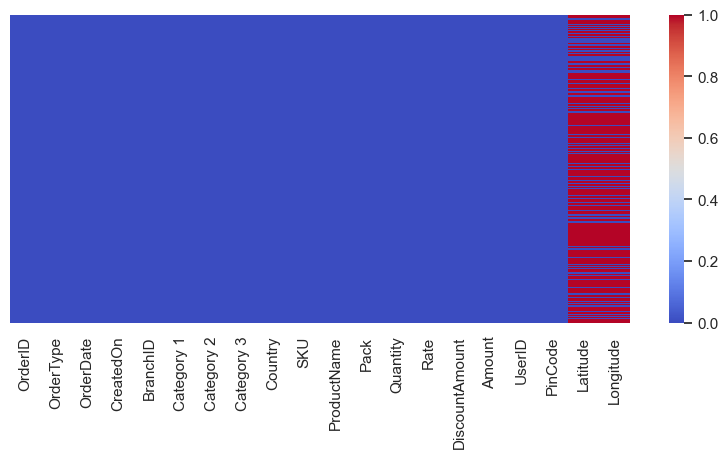

In [10]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),yticklabels=False,cmap="coolwarm")

In [11]:
df.isnull().sum()/len(df)*100

OrderID            0.000000
OrderType          0.000000
OrderDate          0.000000
CreatedOn          0.000000
BranchID           0.000000
Category 1         0.004856
Category 2         0.004856
Category 3         0.004856
Country            0.150544
SKU                0.004856
ProductName        0.004856
Pack               0.004856
Quantity           0.004856
Rate               0.004856
DiscountAmount     0.000000
Amount             0.004856
UserID             0.000000
PinCode            0.000000
Latitude          72.518454
Longitude         72.518454
dtype: float64

<AxesSubplot:>

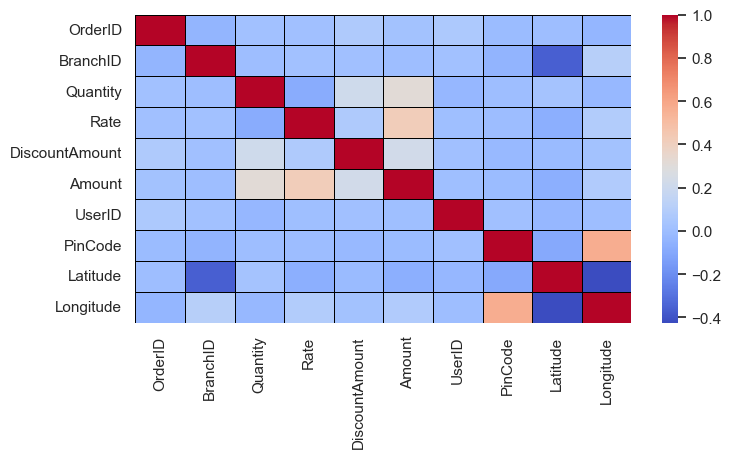

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap="coolwarm",linecolor="black",linewidths=0.5)

C:\Users\kaustubh kapare\AppData\Local\Temp\ipykernel_27844\668424242.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:ylabel='Density'>

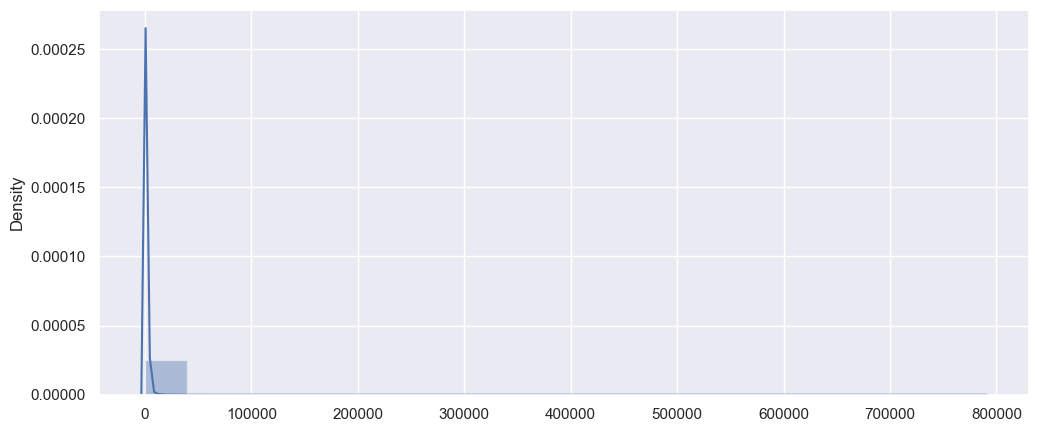

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(x=df["Amount"],kde=True,bins=20)

In [14]:
data = df.copy()

C:\Users\kaustubh kapare\AppData\Local\Temp\ipykernel_27844\1330375248.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:ylabel='Density'>

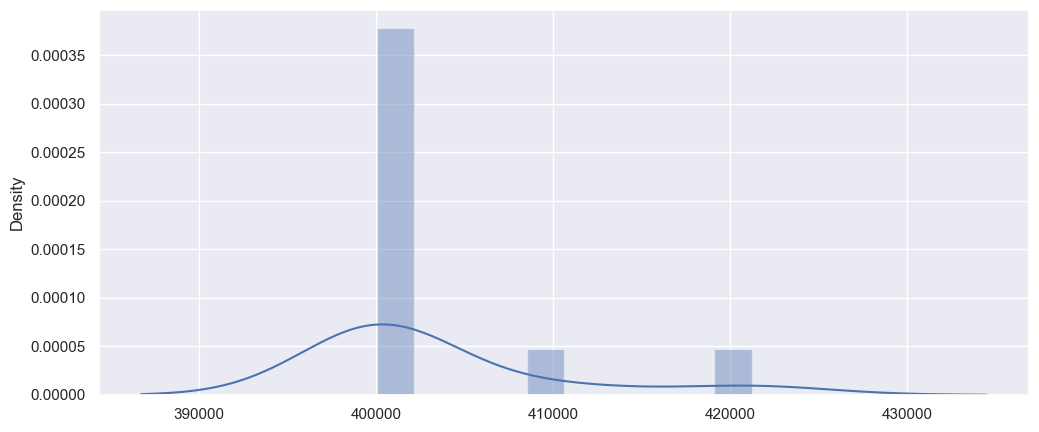

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(x=data["PinCode"].value_counts()[:10].index,bins=10)

<AxesSubplot:ylabel='Amount'>

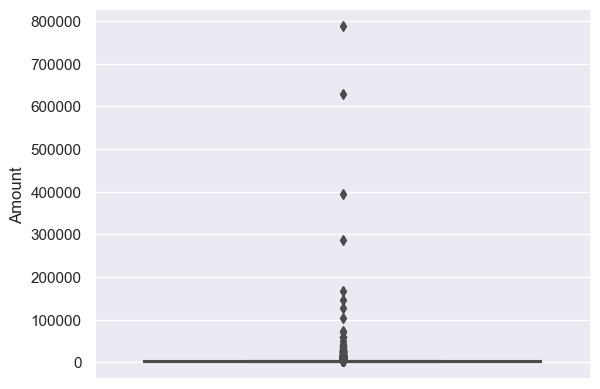

In [16]:
sns.boxplot(df,y="Amount")

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



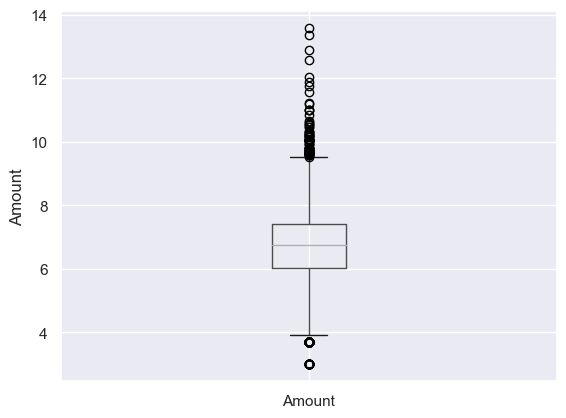

In [17]:
data= df.copy()
data["Amount"] = np.log(data["Amount"])
data.boxplot(column="Amount")
plt.ylabel("Amount")
# plt.title("Amount")
plt.show() 

In [18]:
num_feat = df.select_dtypes(include=["int64","float64"])
num_feat

,OrderID,BranchID,Quantity,Rate,DiscountAmount,Amount,UserID,PinCode,Latitude,Longitude
0,436960,27,1.0,1300.0,0.0,1300.0,169499,401305,NaN,NaN
1,436960,27,1.0,1300.0,0.0,1300.0,169499,401305,NaN,NaN
2,438020,1,1.0,5999.0,0.0,5999.0,407719,421301,19.242871,73.139704
3,438255,1,2.0,185.0,0.0,370.0,138121,421204,NaN,NaN
4,438255,1,1.0,1800.0,0.0,1800.0,138121,421204,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20587,484145,14,7.0,170.0,0.0,1190.0,564482,400098,NaN,NaN
20588,484145,14,1.0,470.0,0.0,470.0,564482,400098,NaN,NaN
20589,484165,14,1.0,2500.0,0.0,2500.0,564509,400098,NaN,NaN
20590,484170,13,8.0,200.0,0.0,1600.0,511818,400049,NaN,NaN


In [19]:
# NUMERICAl dataset of two types DISCRETE AND CONTINOUS
descerte_feat = [feat for feat in num_feat if len(df[feat].unique())<25]
descerte_feat

[]

In [20]:
continous_feat = [feat for feat in num_feat if feat not in descerte_feat]
continous_feat

['OrderID',
 'BranchID',
 'Quantity',
 'Rate',
 'DiscountAmount',
 'Amount',
 'UserID',
 'PinCode',
 'Latitude',
 'Longitude']

In [21]:
# data = df.copy()
# data.drop("PinCode",axis=1,inplace=True)
# num_ft = data.select_dtypes(include=["int64","float64"])
# desc_feat = [feat for feat in num_ft if len(data[feat].unique())<25]
# cont_feat = [feat for feat in num_ft if feat not in desc_feat]
# cont_feat

In [22]:
# for feat in cont_feat:
#         data[feat] = np.log(data[feat])
#         data.boxplot(column=feat)
#         plt.ylabel(f"{feat}")
#         plt.title(f"{feat}")
#         plt.show()     

In [23]:
data["PinCode"] = data["PinCode"].astype(object)
data["PinCode"].value_counts()[:10]

410210    1018
400053     872
401107     680
421204     591
400072     507
400037     493
400076     492
400063     468
400071     448
400607     434
Name: PinCode, dtype: int64

In [24]:
df["Amount"].value_counts(ascending=True)

59950.0      1
19514.0      1
12600.0      1
3950.0       1
4971.0       1
          ... 
1950.0     325
1550.0     348
1500.0     373
1650.0     446
2100.0     469
Name: Amount, Length: 688, dtype: int64

In [25]:
pin_amount = df.groupby("PinCode").mean()["Amount"]

In [26]:
pin_amount.sort_values(ascending=False)

PinCode
400003    43477.500000
411001    10568.756098
400049     5188.301158
400082     4275.000000
400026     3579.139535
              ...     
421306      789.968750
401104      767.222222
401207      723.750000
400090      721.428571
410203      690.000000
Name: Amount, Length: 160, dtype: float64

In [27]:
pin_amount.index[:16]

Int64Index([400001, 400002, 400003, 400004, 400005, 400006, 400007, 400008,
            400009, 400010, 400011, 400012, 400013, 400014, 400015, 400016],
           dtype='int64', name='PinCode')

In [28]:
df["Amount"]

0        1300.0
1        1300.0
2        5999.0
3         370.0
4        1800.0
          ...  
20587    1190.0
20588     470.0
20589    2500.0
20590    1600.0
20591       NaN
Name: Amount, Length: 20592, dtype: float64

In [29]:
pin_amount.sort_values(ascending=False)[:10]

PinCode
400003    43477.500000
411001    10568.756098
400049     5188.301158
400082     4275.000000
400026     3579.139535
400100     3525.000000
400085     3276.000000
400001     3038.611511
411015     3000.000000
400059     2896.068235
Name: Amount, dtype: float64

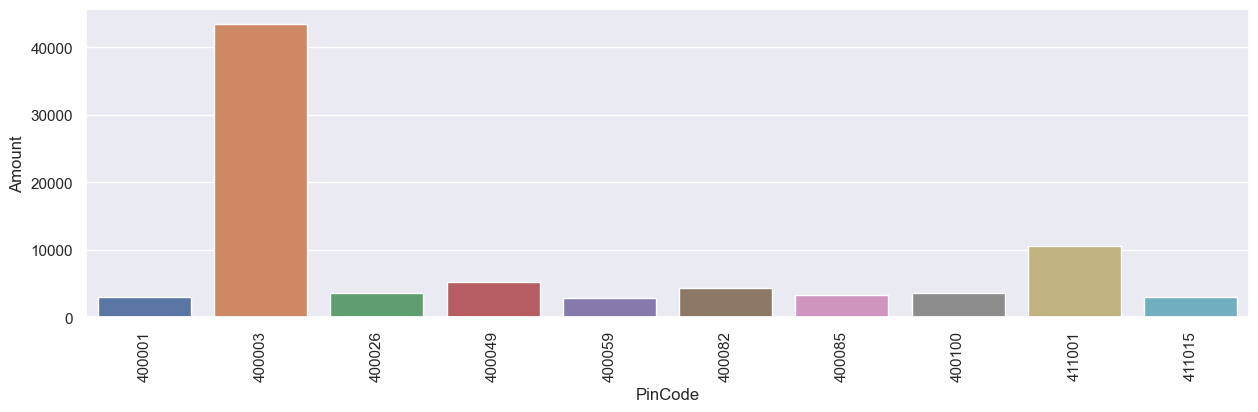

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(x=pin_amount.sort_values(ascending=False)[:10].index,y = pin_amount.sort_values(ascending=False)[:10])
plt.xticks(rotation=90)
plt.show()

In [31]:
df["PinCode"].value_counts().index[:10]

Int64Index([410210, 400053, 401107, 421204, 400072, 400037, 400076, 400063,
            400071, 400607],
           dtype='int64')

In [32]:
hue=df["Category 3"].value_counts()[:3]

In [33]:

df["OrderType"].value_counts()

App    10857
APP     8169
CRM     1566
Name: OrderType, dtype: int64

In [34]:
df["Country"].value_counts()

INDIA                  16743
SCOTLAND                1230
IRELAND                  353
UNITED STATES            329
SWEDEN                   316
AUSTRALIA                245
ITALY                    181
ENGLAND                  178
FRANCE                   155
JAPAN                    152
GERMANY                  120
UNITED KINGDOM            94
RUSSIA                    85
MEXICO                    81
ARGENTINA                 54
CHILE                     44
AUSTRIA                   39
BELGIUM                   38
SOUTH AFRICA              30
SPAIN                     19
PORTUGAL                  13
THAILAND                  13
FINLAND                   10
NEW ZEALAND                8
HOLLAND                    7
CALIFORNIA                 6
POLAND                     6
CUBA                       5
KOREA                      2
ISLE OF ISLAY              1
(NIL)                      1
LITHUANIA                  1
NEPAL                      1
TRININAD AND TOBAGO        1
Name: Country,

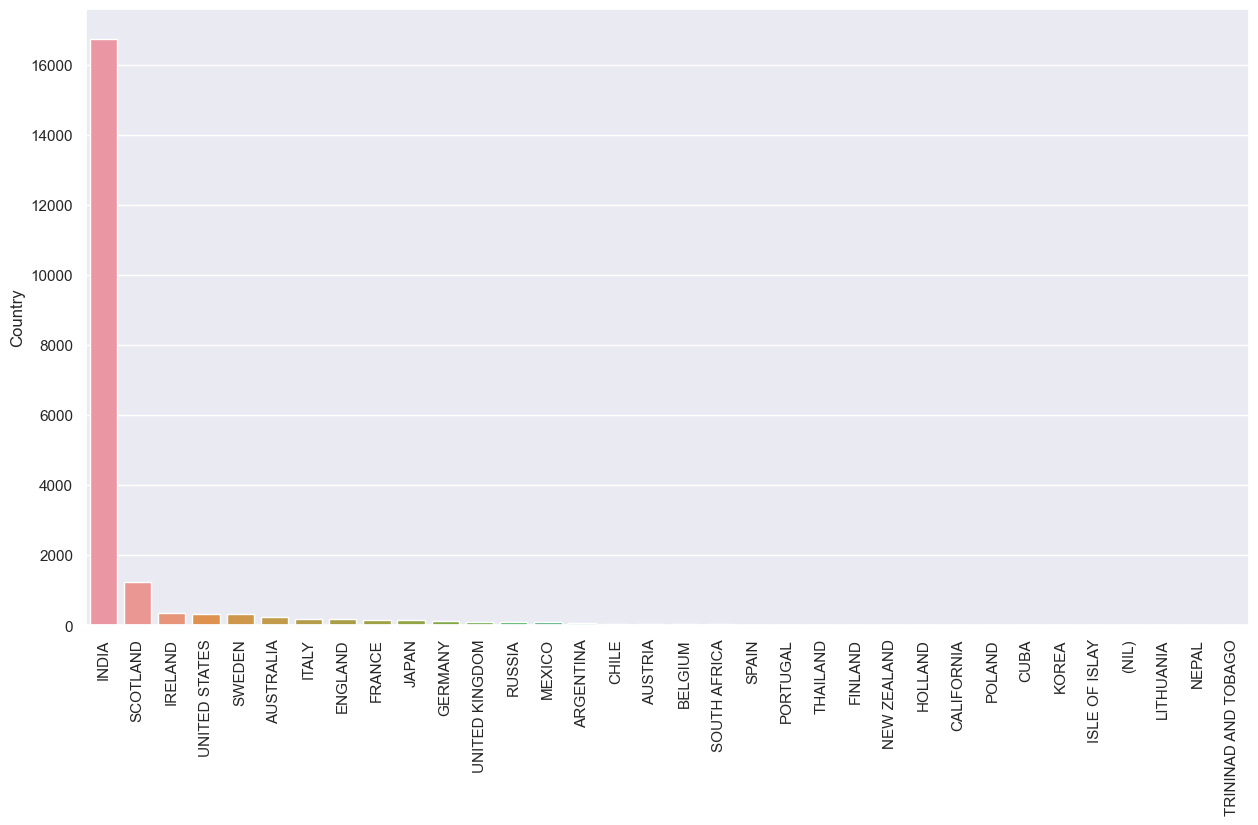

In [35]:
# Most Preferred Country of Origin
plt.figure(figsize=(15,8))
sns.barplot(x = df["Country"].value_counts().index,y= df["Country"].value_counts())
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

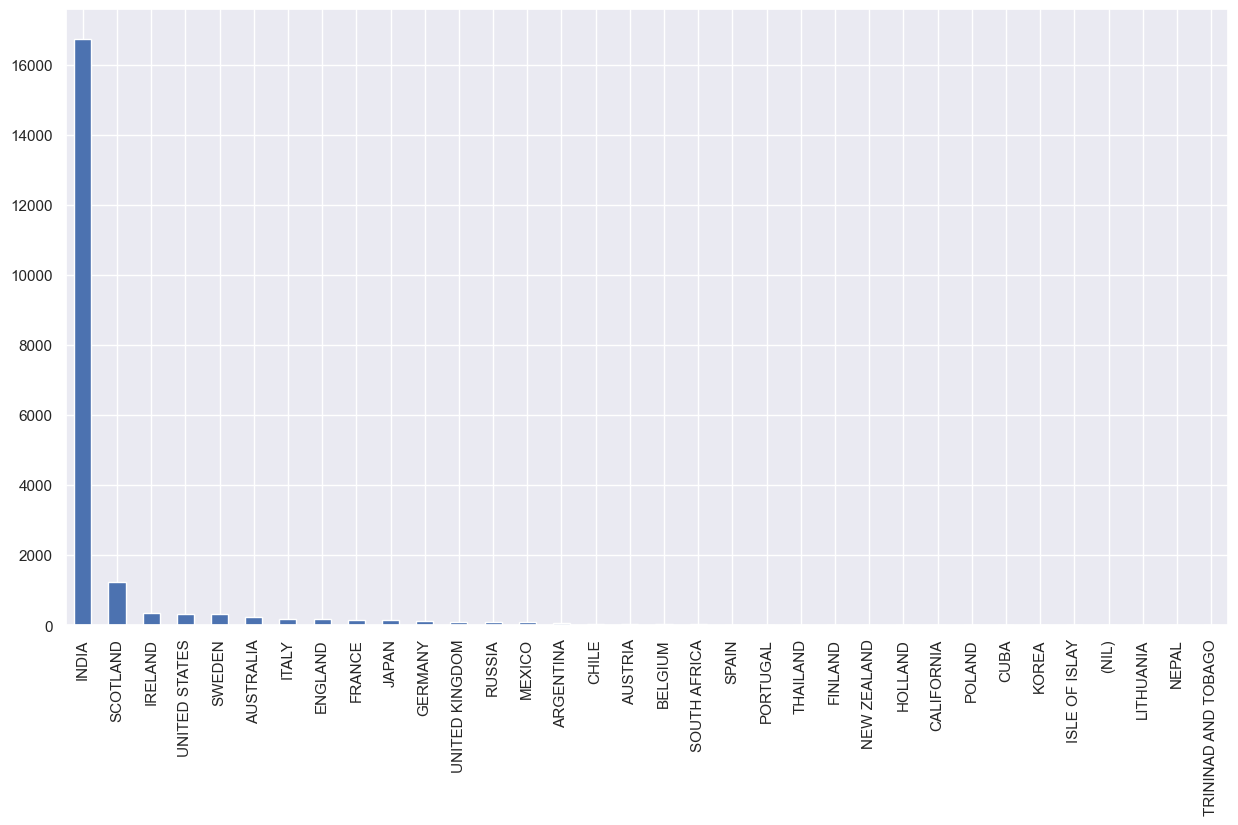

In [36]:
plt.figure(figsize=(15,8))
df["Country"].value_counts().plot(kind="bar")

In [37]:
ordertype_amount = df.groupby("OrderType").mean()["Amount"]

In [38]:
df.groupby("OrderType").mean()["Amount"]

OrderType
APP    1236.187661
App    1361.210943
CRM    3765.857599
Name: Amount, dtype: float64

<AxesSubplot:ylabel='Amount'>

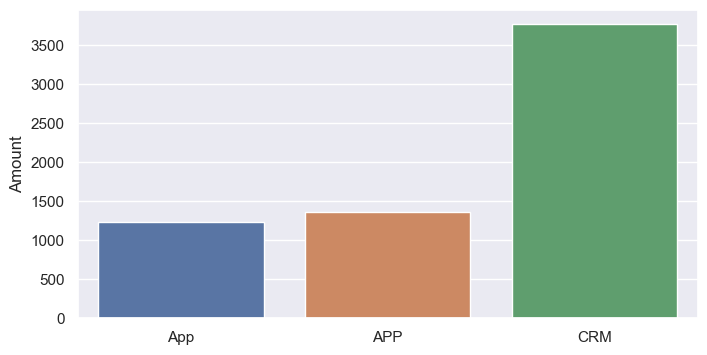

In [39]:
#  Mean Order Amount on each platform
plt.figure(figsize=(8,4))
sns.barplot(x=df["OrderType"].value_counts().index , y = ordertype_amount)

<AxesSubplot:ylabel='OrderType'>

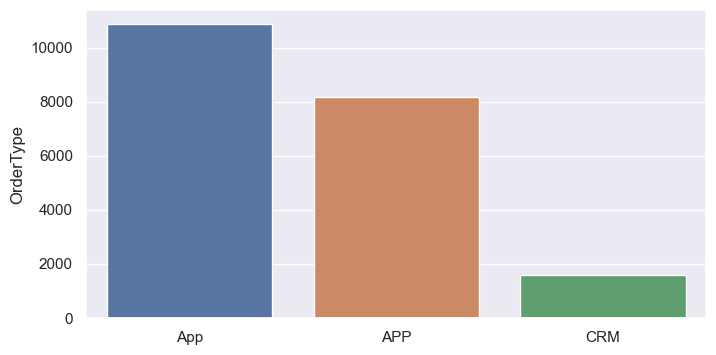

In [40]:
### Preferred platform for buying...
plt.figure(figsize=(8,4))
sns.barplot(x=df["OrderType"].value_counts().index,y=df["OrderType"].value_counts())

In [41]:
df["OrderType"].value_counts()

App    10857
APP     8169
CRM     1566
Name: OrderType, dtype: int64

In [42]:
df["Category 3"].value_counts()

DOMSPIRIT        6396
BEERMILDDOM      4120
IMPSPIRIT        2745
DOMWINE          2323
BEERSTRONGDOM    2134
BREEZER           848
TONIC WATER       710
IMPWINE           651
BEERMILDIMP       292
SOFT DRINK        249
BARMENU           104
BEERSTRONGIMP      17
OTHER               1
CIGARETTE           1
Name: Category 3, dtype: int64

In [43]:
cat3_amount = df.groupby("Category 3").mean()["Amount"]

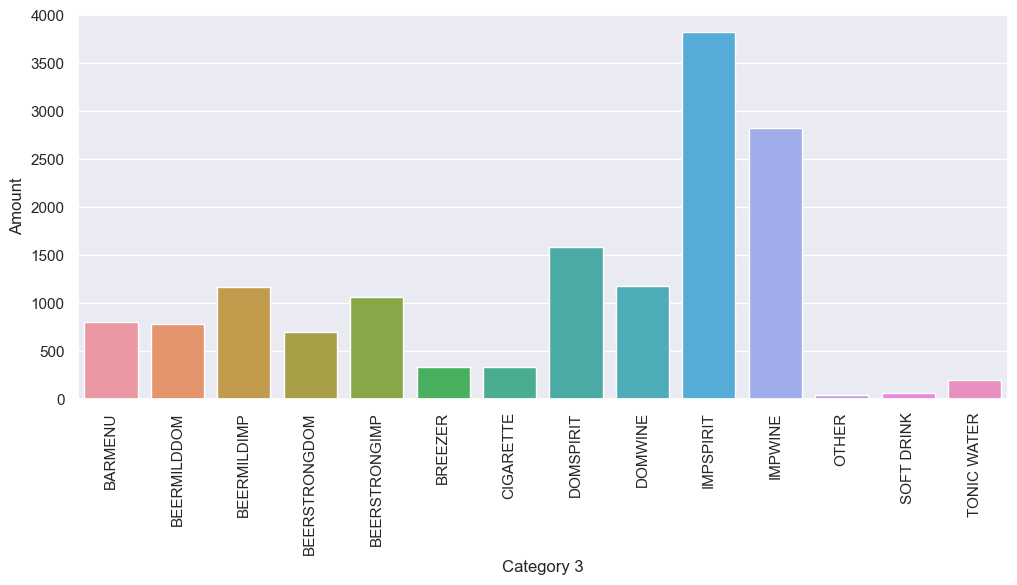

In [44]:
# Highest Mean expenditure on each category 3
plt.figure(figsize=(12,5))
sns.barplot(x=df.groupby("Category 3").mean()["Amount"].index,y=cat3_amount)
plt.xticks(rotation = 90)
plt.show()

In [45]:
df.groupby("Category 3").mean()["Amount"].index

Index(['BARMENU', 'BEERMILDDOM', 'BEERMILDIMP', 'BEERSTRONGDOM',
       'BEERSTRONGIMP', 'BREEZER', 'CIGARETTE', 'DOMSPIRIT', 'DOMWINE',
       'IMPSPIRIT', 'IMPWINE', 'OTHER', 'SOFT DRINK', 'TONIC WATER'],
      dtype='object', name='Category 3')

In [46]:
cat3_amount.sort_values(ascending=False)

Category 3
IMPSPIRIT        3822.746448
IMPWINE          2826.700461
DOMSPIRIT        1585.281270
DOMWINE          1179.050796
BEERMILDIMP      1161.164384
BEERSTRONGIMP    1062.941176
BARMENU           802.788462
BEERMILDDOM       775.527913
BEERSTRONGDOM     696.518276
BREEZER           333.932783
CIGARETTE         330.000000
TONIC WATER       197.283099
SOFT DRINK         61.285141
OTHER              40.000000
Name: Amount, dtype: float64

In [47]:
df.groupby("Amount").mean()

,OrderID,BranchID,Quantity,Rate,DiscountAmount,UserID,PinCode,Latitude,Longitude
Amount,,,,,,,,,
0.0,447412.500000,22.000000,2.500000,0.000000,0.0,264991.500000,405459.500000,19.094142,73.008686
20.0,460894.473684,8.789474,1.000000,20.000000,0.0,379513.184211,401967.421053,19.167540,72.898089
40.0,463846.521739,13.260870,1.373913,32.521739,0.0,352846.982609,401447.982609,19.105551,72.899544
50.0,461642.790698,13.906977,1.000000,50.000000,0.0,337288.976744,401022.348837,19.174863,72.902657
55.0,442907.500000,12.500000,1.000000,55.000000,0.0,449519.500000,400305.000000,19.233604,72.989154
...,...,...,...,...,...,...,...,...,...
166750.0,483430.000000,13.000000,115.000000,1450.000000,43125.0,560961.000000,400049.000000,NaN,NaN
287500.0,483430.000000,13.000000,115.000000,2500.000000,43125.0,560961.000000,400049.000000,NaN,NaN
395000.0,446350.000000,37.000000,1.000000,395000.000000,0.0,537854.000000,411001.000000,18.540996,73.891043


In [48]:
df.groupby("Amount").mean()[["Latitude","Longitude"]].dropna().iloc[-10:]                                                 

,Latitude,Longitude
Amount,,
11000.0,19.085959,72.894729
11250.0,19.150269,72.853025
11500.0,19.009313,72.823419
12495.0,19.103998,72.872107
14800.0,19.011197,72.829761
15000.0,19.152323,72.840073
17000.0,19.181122,72.839798
17400.0,19.210831,72.874741
22750.0,19.238485,72.992608


In [49]:
df.groupby("Amount").mean()[["Latitude","Longitude"]].dropna().index[1:]

Float64Index([    20.0,     40.0,     50.0,     55.0,     60.0,     70.0,
                  75.0,     80.0,     85.0,     95.0,
              ...
               11000.0,  11250.0,  11500.0,  12495.0,  14800.0,  15000.0,
               17000.0,  17400.0,  22750.0, 395000.0],
             dtype='float64', name='Amount', length=434)

In [79]:
df.groupby("Amount").median()["Latitude"].dropna()[1:]

Amount
20.0        19.143282
40.0        19.117002
50.0        19.144278
55.0        19.233604
60.0        19.137049
              ...    
15000.0     19.152323
17000.0     19.181122
17400.0     19.210831
22750.0     19.238485
395000.0    18.540996
Name: Latitude, Length: 434, dtype: float64

In [80]:
df.groupby("Amount").median()["Longitude"].dropna()[1:]

Amount
20.0        72.863694
40.0        72.869109
50.0        72.892341
55.0        72.989154
60.0        72.848864
              ...    
15000.0     72.840073
17000.0     72.839798
17400.0     72.874741
22750.0     72.992608
395000.0    73.891043
Name: Longitude, Length: 434, dtype: float64

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

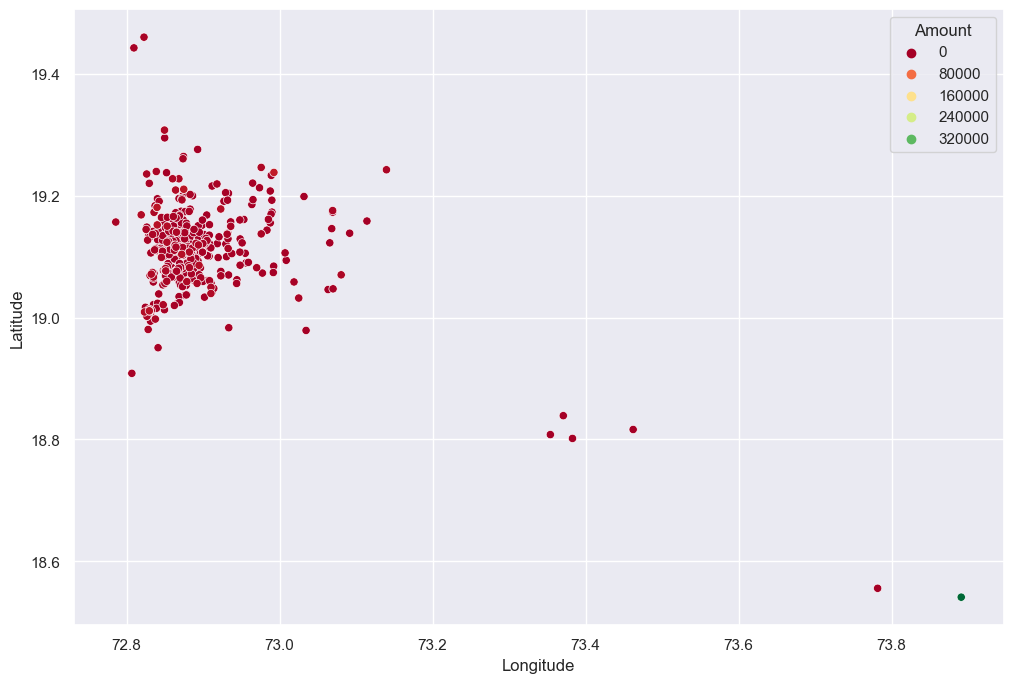

In [81]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.groupby("Amount").median()["Longitude"].dropna(),y=df.groupby("Amount").median()["Latitude"].dropna(),hue=df.groupby("Amount").median().dropna().index,palette="RdYlGn")

In [69]:
df.groupby("PinCode").median()

,OrderID,BranchID,Quantity,Rate,DiscountAmount,Amount,UserID,Latitude,Longitude
PinCode,,,,,,,,,
400001,468895.0,19.0,1.0,250.0,0.0,800.0,277934.0,18.927757,72.831963
400002,467920.0,19.0,1.0,720.0,0.0,1080.0,197626.0,18.946248,72.826472
400003,443675.0,19.0,1.0,1350.0,0.0,1350.0,364774.0,NaN,NaN
400004,459535.0,19.0,1.0,900.0,0.0,1225.0,158390.0,18.956745,72.821741
400005,457805.0,19.0,1.0,750.0,0.0,1350.0,442861.0,18.915500,72.820500
...,...,...,...,...,...,...,...,...,...
421203,464772.5,1.0,1.5,750.0,0.0,1425.0,281267.0,19.205082,73.099725
421204,459140.0,1.0,1.0,560.0,0.0,840.0,266809.0,19.160050,73.111308
421301,464130.0,1.0,1.0,550.0,0.0,900.0,222638.0,19.234022,73.113328


In [67]:
df.groupby("PinCode").median()[["Latitude","Longitude"]].dropna()

,Latitude,Longitude
PinCode,,
400001,18.927757,72.831963
400002,18.946248,72.826472
400004,18.956745,72.821741
400005,18.915500,72.820500
400006,18.957963,72.804096
...,...,...
421203,19.205082,73.099725
421204,19.160050,73.111308
421301,19.234022,73.113328


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

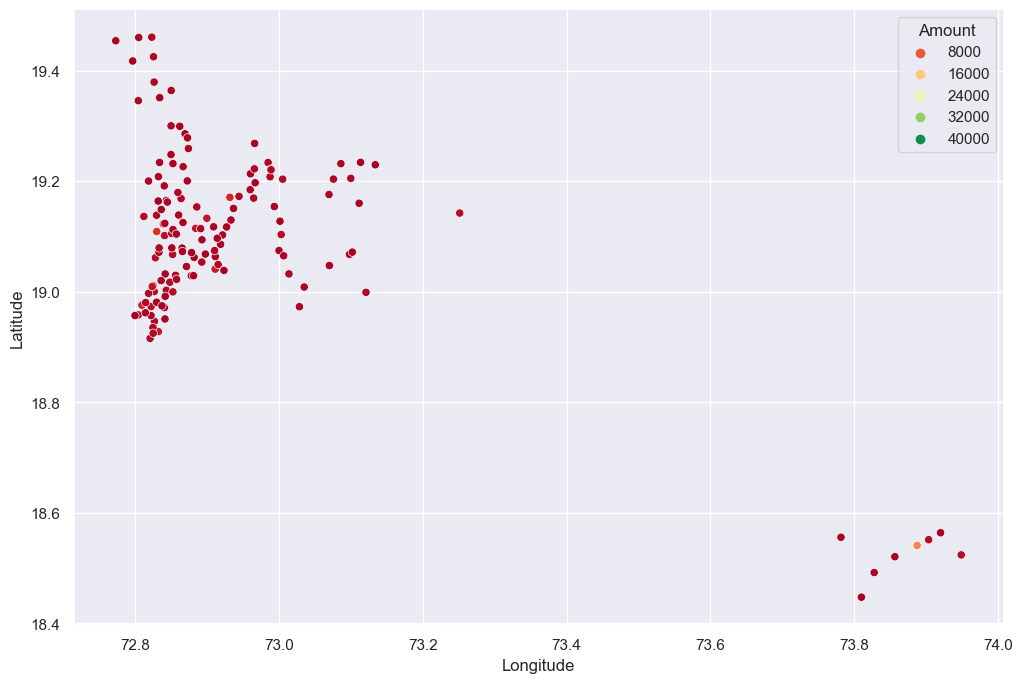

In [82]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.groupby("PinCode").median()["Longitude"].dropna(),y=df.groupby("PinCode").median()["Latitude"],hue=df.groupby("PinCode").mean()["Amount"],palette="RdYlGn")

In [53]:
df["Latitude"].dropna()

2        19.242871
6        18.970391
9        18.544995
10       18.544995
11       18.544995
           ...    
20570    19.148350
20576    19.007882
20578    19.086888
20585    19.167063
20586    19.167063
Name: Latitude, Length: 5659, dtype: float64

In [54]:
df["Longitude"].dropna()

2        73.139704
6        72.810475
9        73.804897
10       73.804897
11       73.804897
           ...    
20570    72.840470
20576    72.823616
20578    73.014539
20585    73.073540
20586    73.073540
Name: Longitude, Length: 5659, dtype: float64

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

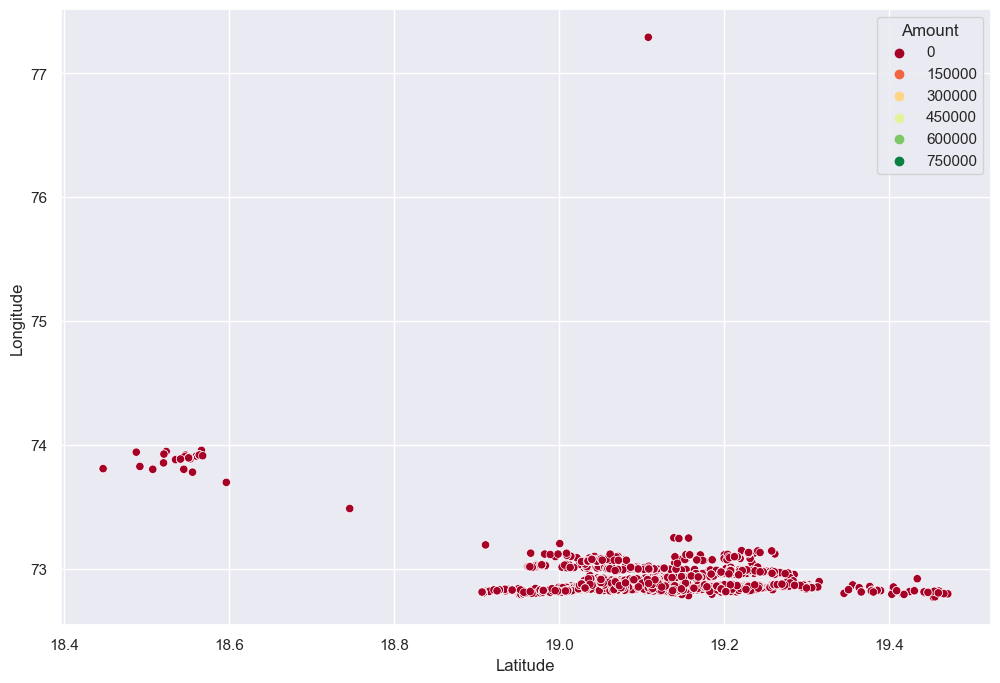

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df["Latitude"].dropna(),y=df["Longitude"].dropna(),hue=df["Amount"],palette="RdYlGn")

<AxesSubplot:>

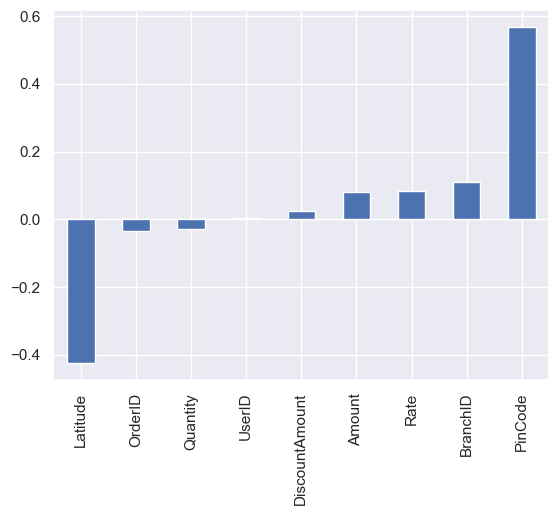

In [56]:
df.corr()["Longitude"].sort_values()[:-1].plot(kind="bar")

In [57]:
df.corr()["Latitude"].sort_values().plot(kind="bar")

In [58]:
longitudal_mean_pin = df.groupby("PinCode").mean()["Longitude"]

In [59]:
longitudal_mean_pin

PinCode
400001    72.852511
400002    72.827987
400003          NaN
400004    72.821741
400005    72.827004
            ...    
421203    73.101659
421204    73.099485
421301    73.091185
421306    73.137028
421503    73.923185
Name: Longitude, Length: 160, dtype: float64

In [60]:
def fill_long(PinCode,Longitude):
    if np.isnan(Longitude):
        return long_mean_pin[PinCode]
    else:
        return Longitude  

In [61]:
df["Longitude"] = df.apply(lambda x:fill_long(x["PinCode"],x["Longitude"]),axis=1)

In [62]:
df.isnull().sum()

In [63]:
df.isnull().sum()/len(df)*100

In [64]:
df["Longitude"].value_counts()

In [65]:
df.corr()["PinCode"].plot(kind="bar")